# Stock Technical Analysis: Python Tutorial

Rate of Change (ROC)

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating Relative Strength Index (RSI).

In this Tutorial, we introduce a new technical indicator, the Rate of Change (ROC).

*'The only thing constant is change'*

The Rate of Change (ROC) is a technical indicator of momentum that measures the percentage change in price between the current price and the price n periods in the past.

The Rate of Change (ROC) is calculated as follows:
    
        ROC = ((Most recent closing price - Closing price n periods ago) / Closing price n periods ago) x 100

The Rate of Change (ROC) is classed as a momentum indicator because it measures strength of price momentum. For example, if a stock's price at the close of trading today is 10, and the closing price five trading days prior was 7, then the Rate of Change (ROC) over that time frame is approximately 43, calculated as (10 - 7 / 7) x 100 = 42.85.

Positive values indicate upward buying pressure or momentum, while negative values below zero indicate selling pressure or downward momentum. Increasing values in either direction, positive or negative, indicate increasing momentum, and decreasing values indicate waning momentum.

The Rate of Change (ROC) is also sometimes used to indicate overbought or oversold conditions for a security. Positive values that are greater than 30 are generally interpreted as indicating overbought conditions, while negative values lower than negative 30 indicate oversold conditions.

Let’s use Python to compute the Rate of Change (ROC).

1.) Import modules.

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.) Define function for querying daily close.

In [4]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

3.) Define function for Rate of Change (ROC).

In [5]:
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

How does the ROC function work?

3.a.) Function calculates difference in most recent closing price from closing price n periods ago. Sets the value to variable M. 

In [ ]:
#M = df.diff(n - 1)  

3.b.) Function calculates closing price n periods ago. Sets the value to variable N. 

In [ ]:
#N = df.shift(n - 1)  

3.c.) Function creates series called ROC that is ((M/N) * 100)

In [ ]:
#ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n)) 

3.d.) Function returns ROC

In [ ]:
#return ROC

4.) Query daily close for ‘FB’ during 2016.

In [6]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))

5.) Run daily close through ROC function. Save series to new column in dataframe. 

In [7]:
df['ROC'] = ROC(df['Close'], 12)
df.tail()

,Close,ROC
Date,,
2016-12-23,117.27,-1.379194
2016-12-27,118.01,-1.395388
2016-12-28,116.92,-0.721746
2016-12-29,116.35,-3.291497
2016-12-30,115.05,-4.292488


6.) Plot daily close and ROC.

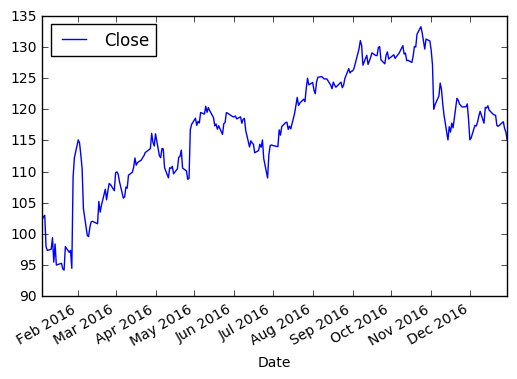

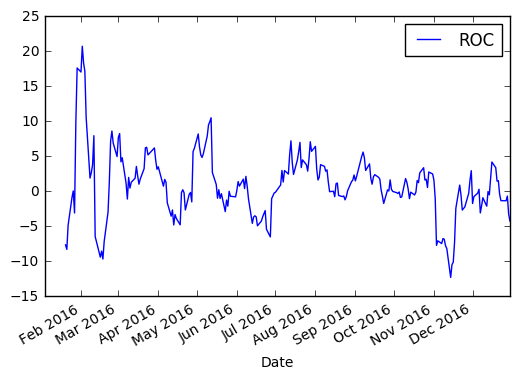

In [8]:
df.plot(y=['Close'])
df.plot(y=['ROC'])

There you have it! We created our ROC indicator. Here’s the full code:

In [9]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
    
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['ROC'] = ROC(df['Close'], 12)
df.tail()

,Close,ROC
Date,,
2016-12-23,117.27,-1.379194
2016-12-27,118.01,-1.395388
2016-12-28,116.92,-0.721746
2016-12-29,116.35,-3.291497
2016-12-30,115.05,-4.292488
